Dans ce TP, on se propose d'implanter et tester les algorithmes de squelettisation homotopique.

Documentation : utiliser l'onglet "**Aide**" du menu et la [doc de skimage](http://scikit-image.org/docs/stable/api/api.html)

Le sujet se trouve sur [Moodle](https://moodle3.unistra.fr/mod/resource/view.php?id=101883).


### Imports 

In [3]:
# visionneuse externe interactive
#imports
import numpy as np # tableaux
import scipy.ndimage as scp # convolution et transformée de distance
import matplotlib.pyplot as plt # visionneur et tracés
import skimage

from skimage import color # gestion de la couleur
from skimage import data # petite banque d'images
from skimage import io # lecture et sauvegarde d'images
from skimage import util # conversions entier <-> flottants etc.
from skimage import filters as flt # 

# chemin d'accès à mes images 
#my_path = "Images/"

### 1. Créer l'image "TETE" du sujet

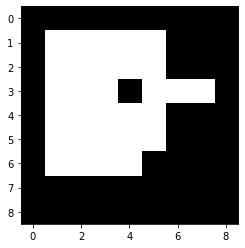

In [9]:
TETE = np.array([
                 [0,0,0,0,0,0,0,0,0],
                 [0,1,1,1,1,1,0,0,0],
                 [0,1,1,1,1,1,0,0,0],
                 [0,1,1,1,0,1,1,1,0],
                 [0,1,1,1,1,1,0,0,0],
                 [0,1,1,1,1,1,0,0,0],
                 [0,1,1,1,1,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0]
                ],dtype=bool)
plt.imshow(TETE,cmap='gray')
plt.show()

### 2. Écrire une fonction pour tester la simplicité d'un pixel. 
En 2D, on peut utiliser le critère de Yokoï :
https://dpt-info.u-strasbg.fr/~cronse/TIDOC/SQ/simple.html

On peut aussi écrire Y8(p) sous forme booléenne : 
`Y8 =  ( ( not x0 ) and ( x1 or x2 ) ) + ...` 

In [17]:
def isSimple(I):
    '''
    Teste si le pixel central de masque I est simple.
    
    La fonction utilise le critère de Yokoï pour la 8-adjacence. 

    :param I: image binaire 3x3 (numpy array avec dtype=bool)
    :return: True si p est simple
    
    :Example:
    
    >>> I = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]], dtype=bool)
    >>> isSimple(I)
    0
    0
    0
    0
    0
    False
    >>> I = np.array([[0, 0, 1], [0, 1, 0], [1,0,0]], dtype=bool)
    >>> isSimple(I)
    0
    0
    0
    0
    0
    False
    >>> I = np.array([[0, 1, 0], [0, 1, 1], [0,0,0]], dtype=bool)
    >>> isSimple(I)
    1
    1
    0
    0
    2
    True
    '''  
    print(I[0,1]*(1-I[0,2]*I[1,2]))
    print(I[1,2]*(1-I[2,2]*I[2,1]))
    print(I[2,1]*(1-I[2,0]*I[1,0]))
    print(I[1,0]*(1-I[0,0]*I[0,1]))
    print(I[0,1]*(1-I[0,2]*I[1,2])+I[1,2]*(1-I[2,2]*I[2,1])+I[2,1]*(1-I[2,0]*I[1,0])+I[1,0]*(1-I[0,0]*I[0,1]))
    return True if ((I[0,1]*(1-I[0,2]*I[1,2])+ I[1,2]*(1-I[2,2]*I[2,1]) + I[2,1]*(1-I[2,0]*I[1,0]) + I[1,0]*(1-I[0,0]*I[0,1])) == 1) else False

import doctest
doctest.testmod()

# Si on veut tester le temps d'exécution :
# %timeit isSimple(np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]], dtype=bool))

**********************************************************************
File "__main__", line 29, in __main__.isSimple
Failed example:
    isSimple(I)
Expected:
    1
    1
    0
    0
    2
    True
Got:
    1
    1
    0
    0
    2
    False
**********************************************************************
1 items had failures:
   1 of   6 in __main__.isSimple
***Test Failed*** 1 failures.


TestResults(failed=1, attempted=6)

### 3. Écrire la fonction hasAtLeast2Neighbors

In [ ]:
def hasAtLeast2Neighbors(I):
    '''
    Retourne True si le pixel central de I a au moins deux 8-voisins.
    
    Le pixel central est censé être allumé.
    
    :param I: image binaire 3x3 (numpy array)
    :return: True si p a au moins deux 8-voisins
    '''
    return True if numpy.array(I,dtype=bool).sum()-1 >= 2 else False

### 4. Écrire la fonction algoSeq(img, cond_geo) qui implante l'algorithme séquentiel. 
Pour itérer sur l'image en ayant accès aux coordonnées des pixels voir ici :

https://docs.scipy.org/doc/numpy/reference/arrays.nditer.html#tracking-an-index-or-multi-index

Tester votre fonction sur l'image TETE.


In [ ]:
def algoSeq(img, geo_cond=lambda I:True):
    '''
    Réalise un amincissement homotopique de l'image img en suivant l'algorithme séquentiel
    
    Par effet de bord, la fonction affiche le nombre de pixels supprimés à chaque itération
    puis le nombre d'itérations effectuées.
    
    :param img: image binaire (numpy array avec dtype=bool)
    :param geo_cond: fonction de type nd.array binaire 3x3 -> bool utilisée comme critère géométrique dans l'algo.
    :return: L'image amincie.
    '''
    
    ...

### 5. Écrire une fonction algoSeqMem implantant l'algorithme séquentiel à mémoire puis traiter la question 1.2 du TD

### 6. Écrire une fonction algoPar implantant l'algorithme parallèle puis traiter la question 1.3 du TD

### 7. Écrire une fonction algoParMailles implantant l'algorithme parallèle à deux sous-mailles puis traiter la question 1.4 du TD.

### 8. Pour aller plus loin avec d'autres images ...
   * a) Utiliser les fonctions d'amincissement précédentes sur les images cheval et A. 
   * b) Lisser le bord du cheval avec les fonctions morphologiques opening et closing et refaire les amincissements. 